<h1>(Zadanie numeryczne NUM1)</h1> Napisz program wyliczający przybliżenie pochodnej ze wzorów:
    <ul>
          <li>$\large D_{h}f(x) = \frac{f(x+h) - f(x)}{h},$</li>
          <li>$\large D_{h}f(x) = \frac{f(x+h) - f(x-h)}{2h}$</li>
    </ul>

Przeanalizuj, jak zachowuje się błąd $\large |Df(x) - f'(x)|$ dla funkcji $\large f(x) = sin(x)$ oraz punktu x = 0.2 przy
zmianie parametru h dla różnych typów zmiennoprzecinkowych (float, double).
Wykreśl $\large |Df(x) - f'(x)|$ w funkcji h w skali logarytmicznej. Poeksperymentuj również używając innych funkcji (np. exp, cos).

In [98]:
import numpy as np
import matplotlib.pyplot as plt

Pochodną f'(x) funkcji f(x) w punkcie x = a definiujemy jako:
$$\large
f^{\prime}(a)=\lim _{x \rightarrow a} \frac{f(x)-f(a)}{x-a}
$$
Pochodna w x = a to nachylenie w tym punkcie. Aby otrzymać skończone przybliżenie numeryczne, możemy użyć wartości sąsiednich do punktu x = a.

<h2>Zdefiniujmy funkcje wyliczające przybliżenie pochodnej: <br/>
    <ul>
          <li>$\large D_{h}f(x) = \frac{f(x+h) - f(x)}{h},$</li>
          <li>$\large D_{h}f(x) = \frac{f(x+h) - f(x-h)}{2h}$</li>
    </ul>
<h2>

In [99]:
def df1(y, h):
    forward_diff = (np.roll(y, -1) - y)/h
    return forward_diff

def df2(y, h):
    central_diff = (np.roll(y, -1) - np.roll(y, 1))/(2*h)
    return central_diff


<h2>Przykład wyliczenia numerycznej pochodnej ze wzorów dla $\Large y = x^2$</h2>

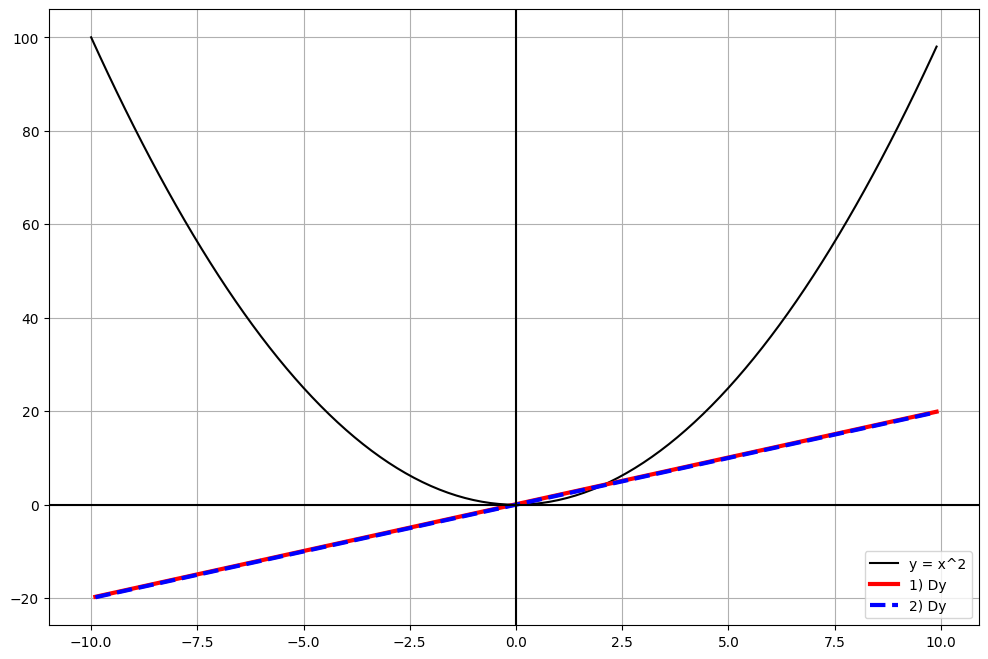

In [100]:
# define step
h = 0.1
# define arguments
x = np.arange(-10, 10, h, dtype = np.float64)
# compute function
y = np.power(np.arange(-10, 10, h, dtype = np.float64), 2)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y, label = 'y = x^2', color="black")
plt.plot(x[1:], df1(y, h)[1:], '-', linewidth = 3, label = '1) Dy', color="red")
plt.plot(x[1:], df2(y, h)[1:], '--', linewidth = 3, label = '2) Dy', color="blue")
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

<h2>Przykład dla $\Large f(x) = cos(x)$</h2>

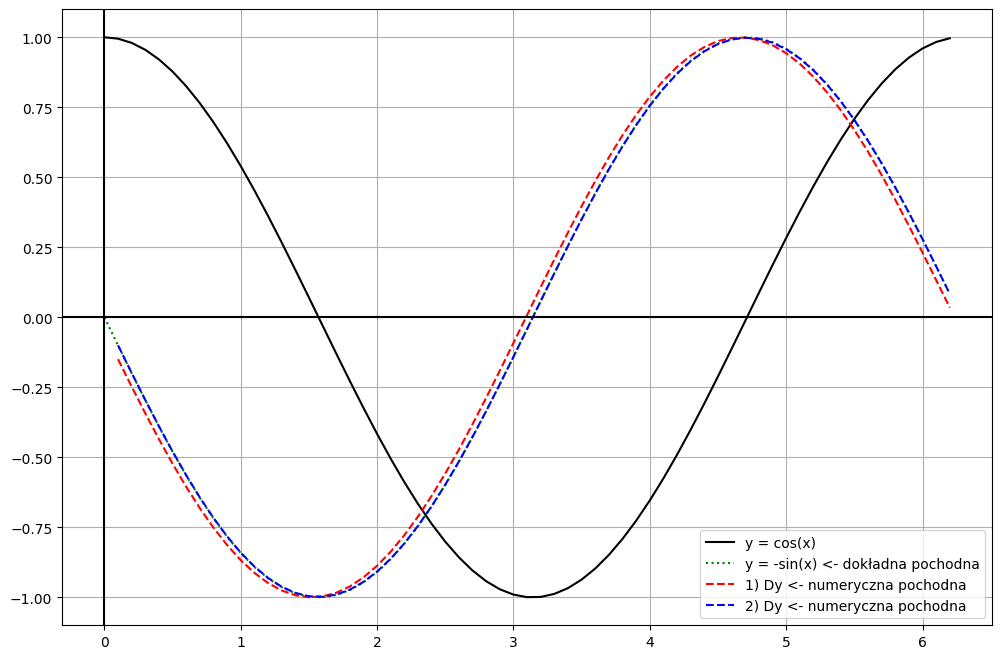

In [101]:
# define step
h = 0.1
# define arguments
x = np.arange(0, 2*np.pi, h, dtype = np.float64)
# compute function
y = np.cos(x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y, label = 'y = cos(x)', color="black")
plt.plot(x, -np.sin(x), linestyle=':', label = 'y = -sin(x) <- dokładna pochodna', color="green")
plt.plot(x[1:], df1(y, h)[1:], '--', label = '1) Dy <- numeryczna pochodna', color="red")
plt.plot(x[1:], df2(y, h)[1:], '--', label = '2) Dy <- numeryczna pochodna', color="blue")
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

<h2>Przykład dla $\Large f(x) = sin(x)$</h2>

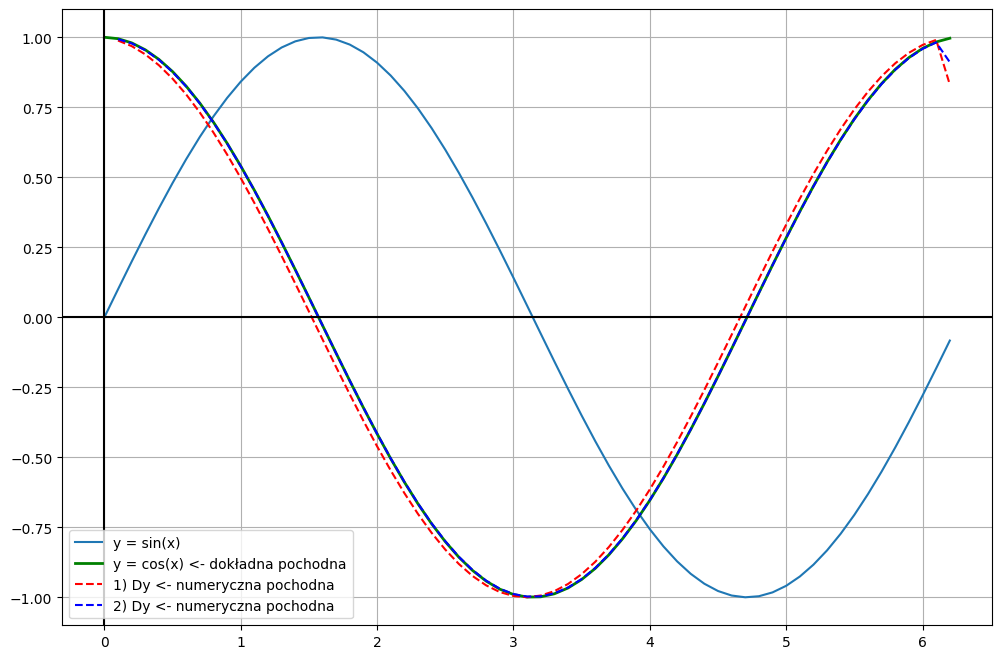

In [102]:
# define step
h = 0.1
# define arguments
x = np.arange(0, 2*np.pi, h, dtype = np.float64)
# compute function
y = np.sin(x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y, label = 'y = sin(x)')
plt.plot(x, np.cos(x), linestyle='-', linewidth = 2, label = 'y = cos(x) <- dokładna pochodna', color="green")
plt.plot(x[1:], df1(y, h)[1:], '--', label = '1) Dy <- numeryczna pochodna', color="red")
plt.plot(x[1:], df2(y, h)[1:], '--', label = '2) Dy <- numeryczna pochodna', color="blue")
plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

<h2>Analiza błędu $\large |Df(x) - f'(x)|$ dla funkcji $\large f(x) = sin(x)$ oraz punktu x = 0.2 przy zmianie paramentru h (float, double)</h2>

<h3>(1) Definicja funkcji zwracających błąd przybliżenia dla danego h</h3>
<ul>
    <li> e64 wykorzystuje typ zmiennoprzecinkowy float64 </li>
    <li> e32 wykorzystuje typ zmiennoprzecinkowy float32 </li>
</ul>

In [103]:
def e64(h):
    # define arguments
    x = np.float64(0.2)
    x_and_neighbours = np.arange(0.2 - h, 0.2 + 2*h, h, dtype = np.float64)
    # compute function
    y = np.sin(x_and_neighbours)

    df_dokladna = np.cos(x)
    df_dyskretna = (y[2] - y[0]) / (2*h)

    return df_dokladna - df_dyskretna


def e32(h):
    # define arguments
    x = np.float32(0.2)
    x_and_neighbours = np.arange(0.2 - h, 0.2 + 2*h, h, dtype = np.float32)
    # compute function
    y = np.sin(x_and_neighbours)

    df_dokladna = np.cos(x)
    df_dyskretna = (y[2] - y[0]) / (2*h)

    return df_dokladna - df_dyskretna


<h3>(2) Generowanie danych dla h z przedziału $\lt step, step^{-1} \gt$ dla float64 i float32 </h3>

In [104]:
step = 0.000001

h_xrange64 = np.zeros(int(1/step), dtype=np.float64)
h_yrange64 = np.zeros(int(1/step), dtype=np.float64)

h_xrange32 = np.zeros(int(1/step), dtype=np.float32)
h_yrange32 = np.zeros(int(1/step), dtype=np.float32)

i = 0
for h in np.arange(step, 1 + step, step, dtype = np.float64):
    h_xrange64[i] = h
    h_yrange64[i] = e64(h)
    #print(i, ': ', e64(h))
    i = i + 1

i = 0
for h in np.arange(step, 1 + step, step, dtype = np.float32):
    h_xrange32[i] = h
    h_yrange32[i] = e32(h)
    #print(i, ': ', e32(h))
    i = i + 1


<h3>(3) Rysowanie wykresów w skali log</h3>

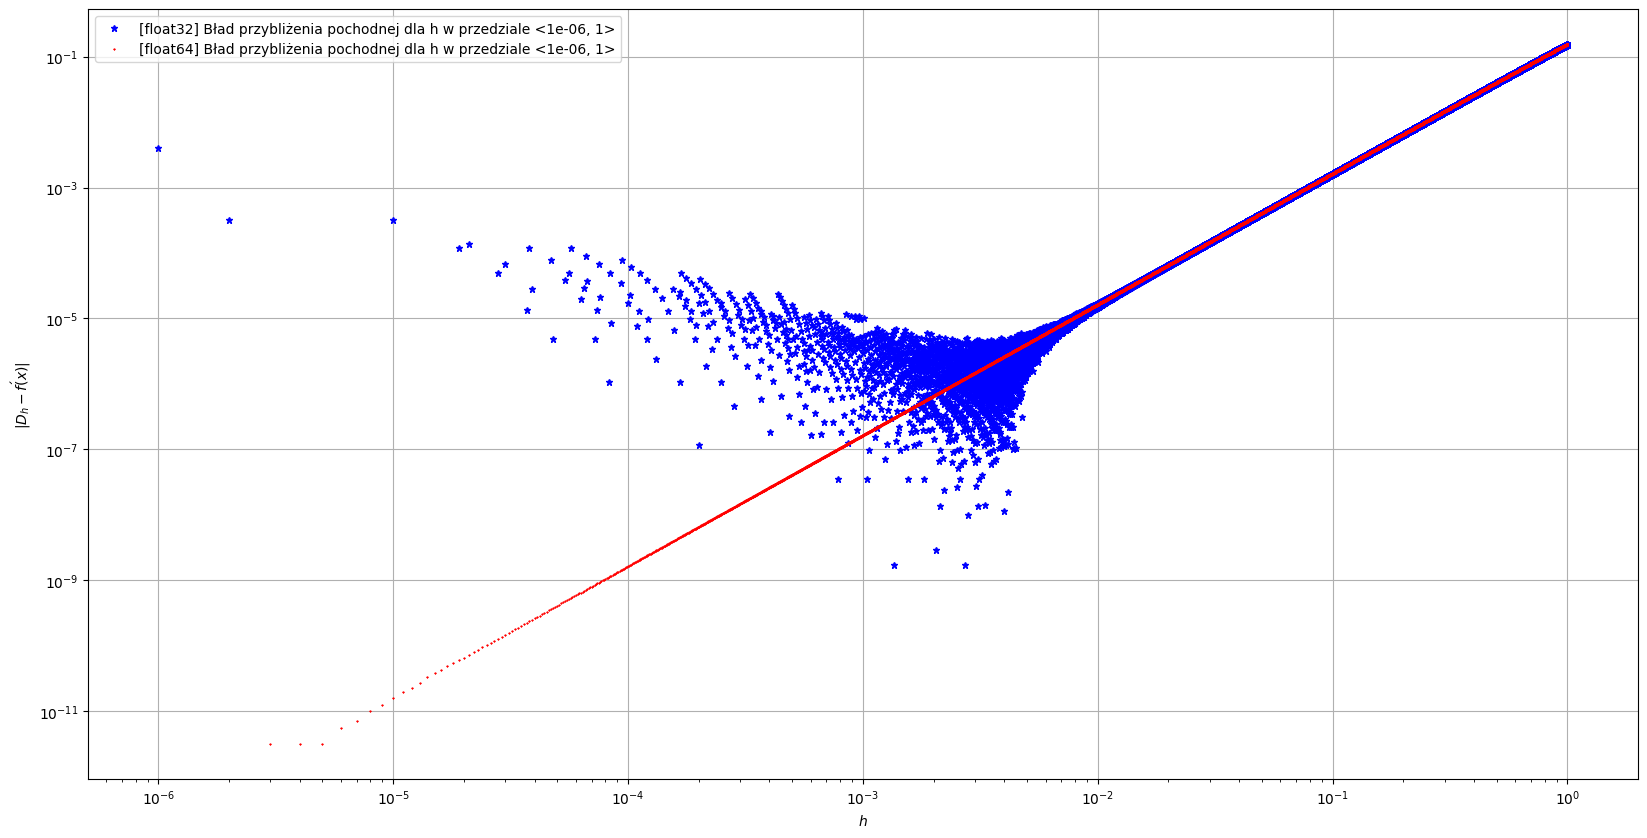

[float64] Błąd maksymalny wynosi:  0.15536898940786714 dla h =  1.0
[float32] Błąd maksymalny wynosi:  0.15536898 dla h =  1.0


In [105]:
# Plot solution
plt.figure(figsize = (20, 10))
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(h_xrange32[:-1], h_yrange32[:-1], '*', markersize = 5, label = f'[float32] Bład przybliżenia pochodnej dla h w przedziale <{step}, {int(step + 1)}>', color="blue")
plt.plot(h_xrange64[:-1], h_yrange64[:-1], '*', markersize = 1, label = f'[float64] Bład przybliżenia pochodnej dla h w przedziale <{step}, {int(step + 1)}>', color="red")

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$h$')
plt.ylabel(r'$|D_{h} - f\'(x)|$')
plt.legend()
#plt.savefig('wykres.png')
plt.show()
print("[float64] Błąd maksymalny wynosi: ", h_yrange64[-1], "dla h = ", h_xrange64[-1])
print("[float32] Błąd maksymalny wynosi: ", h_yrange32[-1], "dla h = ", h_xrange32[-1])

# Wyniki można zapisać do pliku tekstowego żeby np. zwizualizować je w gnuplot
# np.savetxt('xrange.txt', h_xrange64, delimiter='\n')
# np.savetxt('yrange.txt', h_yrange64, delimiter='\n')

<h1> Wnioski </h1>
<p1> Wykorzystując h rzędu $10^{-5}$ jesteśmy w stanie numerycznie obliczyć wartość pochodnej z błędem przybliżenia $\approx 10^{-11}$, co jest bardzo optymalnym rozwiązaniem. $$\\$$</p1>
<p>Liniowo rosnący bład przybliżenia pochodnej jest spodziewany ponieważ wzór wykorzystuje wartości sąsiednie punktu x, a im mniejsza będzie ta wartość (h), tym dokładniej
będziemy w stanie przybliżyć kolejne nachylenia pochodnej.</p>
<p>Czemu jednak dla naprawdę małych h, zwłaszcza w przypadku użycia typu zmiennoprzecinkowego o szerokości słowa 32 bit,
błąd przybliżenia jest niestabilny i niekoniecznie malejący?</p>
<p>Wynika to z wpływu błędów zaokrąglenia gdy ułamki (ich rozwinięcia binarne) nie są w stanie być dokładnie reprezentowane w pamięci
z powodu braku wolnych bitów.</p>
<p>Z tego powodu, dla obliczeń numerycznych wymagających bardzo dużej precyzji, lepiej jest wykorzystywać typ danych float64.</p>